#  PROJECT 3

## Import Libraries

In [1]:
#uploaded all the necessary libraries

import itertools
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


### Load Dataset

In [2]:
df = pd.read_csv('vehicle_data - vehicle_data.csv')

In [3]:
df.head()
#This shows the top 5 rows of the dataset

COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0    -0.043478     0.153846              0.194444     -0.353712   
1    -0.217391    -0.384615              0.222222     -0.676856   
2     0.347826     0.307692              0.833333     -0.082969   
3    -0.130435    -0.384615              0.166667     -0.519651   
4    -0.478261    -0.153846             -0.166667     -0.117904   

   PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0             -0.450549                -0.698113      -0.346405   
1             -0.780220                -0.735849      -0.516340   
2             -0.582418                -0.698113       0.241830   
3             -0.648352                -0.735849      -0.581699   
4              0.230769                 0.886792      -0.516340   

   ELONGATEDNESS  PR.AXIS RECTANGULARITY  MAX.LENGTH RECTANGULARITY  \
0      -0.085714               -0.500000                   0.171429   
1       0.085714               -0.666667                  -0.285714   
2      -0.657143                     NaN                   0.142857   
3       0.142857               -0.666667                  -0.285714   
4       0.085714               -0.666667                  -0.257143   

   SCALED VARIANCE Major  SCALED VARIANCE Minor  SCALED RADIUS OF GYRATION  \
0              -0.515789              -0.532374                  -0.056604   
1              -0.578947              -0.649880                  -0.383648   
2              -0.021053               0.081535                   0.396226   
3              -0.684211              -0.700240                  -0.773585   
4               0.168421              -0.661871                  -0.006289   

   SKEWNESS Major  SKEWNESS Minor  KURTOSIS Major  KURTOSIS Minor  \
0       -0.710526       -0.454545       -0.219512       -0.266667   
1       -0.657895       -0.181818       -0.317073       -0.133333   
2       -0.631579        0.272727       -0.560976       -0.200000   
3       -0.894737       -0.454545       -0.512195        0.533333   
4        0.789474       -0.181818       -0.463415       -0.733333   

   HOLLOWS RATIO  
0       0.066667  
1       0.200000  
2            NaN  
3       0.733333  
4      -0.866667

In [4]:
df.tail()
#This shows the bottom 5 rows.

COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
841    -0.130435    -0.538462              0.305556     -0.310044   
842    -0.304348          NaN              0.222222     -0.484716   
843     0.434783     0.615385              0.694444      0.030568   
844    -0.434783    -0.769231              0.055556     -0.633188   
845    -0.478261    -0.769231             -0.277778     -0.834061   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
841             -0.626374                -0.773585      -0.254902   
842             -0.582418                -0.660377      -0.385621   
843             -0.560440                -0.622642       0.437908   
844             -0.758242                -0.811321      -0.699346   
845             -0.824176                -0.886792      -0.895425   

     ELONGATEDNESS  PR.AXIS RECTANGULARITY  MAX.LENGTH RECTANGULARITY  \
841      -0.200000               -0.500000                  -0.542857   
842      -0.028571               -0.500000                   0.171429   
843      -0.771429                0.333333                   0.571429   
844       0.371429               -0.833333                  -0.828571   
845       0.714286               -1.000000                  -0.714286   

     SCALED VARIANCE Major  SCALED VARIANCE Minor  SCALED RADIUS OF GYRATION  \
841              -0.263158              -0.429257                  -0.496855   
842              -0.547368              -0.558753                  -0.157233   
843               0.031579               0.287770                   0.144654   
844              -0.736842              -0.793765                  -0.509434   
845              -0.894737              -0.932854                  -0.723270   

     SKEWNESS Major  SKEWNESS Minor  KURTOSIS Major  KURTOSIS Minor  \
841       -0.657895       -0.363636        0.219512       -0.200000   
842       -0.657895       -0.909091       -0.024390       -0.333333   
843       -0.710526       -0.727273       -0.804878       -0.266667   
844       -0.815789       -1.000000        0.219512       -0.066667   
845       -0.631579       -0.909091       -0.121951       -0.333333   

     HOLLOWS RATIO  
841      -0.066667  
842       0.066667  
843       0.333333  
844      -0.066667  
845      -0.400000

### This shows how many null values we have in the dataset. There are 11 columns which has nul values and intotal of 301 null values.

In [5]:
df.isnull().sum()


COMPACTNESS                  30
CIRCULARITY                  48
DISTANCE CIRCULARITY         23
RADIUS RATIO                  0
PR.AXIS ASPECT RATIO          0
MAX.LENGTH ASPECT RATIO       0
SCATTER RATIO                 0
ELONGATEDNESS                 0
PR.AXIS RECTANGULARITY       52
MAX.LENGTH RECTANGULARITY    11
SCALED VARIANCE Major        11
SCALED VARIANCE Minor         1
SCALED RADIUS OF GYRATION     0
SKEWNESS Major                1
SKEWNESS Minor               32
KURTOSIS Major                0
KURTOSIS Minor               41
HOLLOWS RATIO                51
dtype: int64

In [6]:
## Mean value of all the columns.
df.mean()

COMPACTNESS                 -0.104646
CIRCULARITY                 -0.092828
DISTANCE CIRCULARITY         0.173856
RADIUS RATIO                -0.432831
PR.AXIS ASPECT RATIO        -0.677058
MAX.LENGTH ASPECT RATIO     -0.752175
SCATTER RATIO               -0.257003
ELONGATEDNESS               -0.146640
PR.AXIS RECTANGULARITY      -0.429261
MAX.LENGTH RECTANGULARITY   -0.144773
SCALED VARIANCE Major       -0.387936
SCALED VARIANCE Minor       -0.386761
SCALED RADIUS OF GYRATION   -0.173543
SKEWNESS Major              -0.646496
SKEWNESS Minor              -0.436788
KURTOSIS Major              -0.385401
KURTOSIS Minor              -0.144845
HOLLOWS RATIO               -0.026080
dtype: float64

In [7]:
df.fillna(df.mean())

COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0      -0.043478     0.153846              0.194444     -0.353712   
1      -0.217391    -0.384615              0.222222     -0.676856   
2       0.347826     0.307692              0.833333     -0.082969   
3      -0.130435    -0.384615              0.166667     -0.519651   
4      -0.478261    -0.153846             -0.166667     -0.117904   
..           ...          ...                   ...           ...   
841    -0.130435    -0.538462              0.305556     -0.310044   
842    -0.304348    -0.092828              0.222222     -0.484716   
843     0.434783     0.615385              0.694444      0.030568   
844    -0.434783    -0.769231              0.055556     -0.633188   
845    -0.478261    -0.769231             -0.277778     -0.834061   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0               -0.450549                -0.698113      -0.346405   
1               -0.780220                -0.735849      -0.516340   
2               -0.582418                -0.698113       0.241830   
3               -0.648352                -0.735849      -0.581699   
4                0.230769                 0.886792      -0.516340   
..                    ...                      ...            ...   
841             -0.626374                -0.773585      -0.254902   
842             -0.582418                -0.660377      -0.385621   
843             -0.560440                -0.622642       0.437908   
844             -0.758242                -0.811321      -0.699346   
845             -0.824176                -0.886792      -0.895425   

     ELONGATEDNESS  PR.AXIS RECTANGULARITY  MAX.LENGTH RECTANGULARITY  \
0        -0.085714               -0.500000                   0.171429   
1         0.085714               -0.666667                  -0.285714   
2        -0.657143               -0.429261                   0.142857   
3         0.142857               -0.666667                  -0.285714   
4         0.085714               -0.666667                  -0.257143   
..             ...                     ...                        ...   
841      -0.200000               -0.500000                  -0.542857   
842      -0.028571               -0.500000                   0.171429   
843      -0.771429                0.333333                   0.571429   
844       0.371429               -0.833333                  -0.828571   
845       0.714286               -1.000000                  -0.714286   

     SCALED VARIANCE Major  SCALED VARIANCE Minor  SCALED RADIUS OF GYRATION  \
0                -0.515789              -0.532374                  -0.056604   
1                -0.578947              -0.649880                  -0.383648   
2                -0.021053               0.081535                   0.396226   
3                -0.684211              -0.700240                  -0.773585   
4                 0.168421              -0.661871                  -0.006289   
..                     ...                    ...                        ...   
841              -0.263158              -0.429257                  -0.496855   
842              -0.547368              -0.558753                  -0.157233   
843               0.031579               0.287770                   0.144654   
844              -0.736842              -0.793765                  -0.509434   
845              -0.894737              -0.932854                  -0.723270   

     SKEWNESS Major  SKEWNESS Minor  KURTOSIS Major  KURTOSIS Minor  \
0         -0.710526       -0.454545       -0.219512       -0.266667   
1         -0.657895       -0.181818       -0.317073       -0.133333   
2         -0.631579        0.272727       -0.560976       -0.200000   
3         -0.894737       -0.454545       -0.512195        0.533333   
4          0.789474       -0.181818       -0.463415       -0.733333   
..              ...             ...             ...             ...   
841       -0

### Replaced the null values with the mean value.

In [8]:
df['COMPACTNESS'].fillna(value=df['COMPACTNESS'].mean(), inplace=True)

In [9]:
df['CIRCULARITY'].fillna(value=df['CIRCULARITY'].mean(), inplace=True)
df['DISTANCE CIRCULARITY'].fillna(value=df['DISTANCE CIRCULARITY'].mean(), inplace=True)
df['PR.AXIS RECTANGULARITY'].fillna(value=df['PR.AXIS RECTANGULARITY'].mean(), inplace=True)
df['MAX.LENGTH RECTANGULARITY'].fillna(value=df['MAX.LENGTH RECTANGULARITY'].mean(), inplace=True)
df['SCALED VARIANCE Major'].fillna(value=df['SCALED VARIANCE Major'].mean(), inplace=True)
df['SCALED VARIANCE Minor'].fillna(value=df['SCALED VARIANCE Minor'].mean(), inplace=True)
df['SKEWNESS Major'].fillna(value=df['SKEWNESS Major'].mean(), inplace=True)
df['SKEWNESS Minor'].fillna(value=df['SKEWNESS Minor'].mean(), inplace=True)
df['KURTOSIS Minor'].fillna(value=df['KURTOSIS Minor'].mean(), inplace=True)
df['HOLLOWS RATIO'].fillna(value=df['HOLLOWS RATIO'].mean(), inplace=True)




In [10]:
### No null values after replacing it with mean value.
df.isnull().sum()


COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE CIRCULARITY         0
RADIUS RATIO                 0
PR.AXIS ASPECT RATIO         0
MAX.LENGTH ASPECT RATIO      0
SCATTER RATIO                0
ELONGATEDNESS                0
PR.AXIS RECTANGULARITY       0
MAX.LENGTH RECTANGULARITY    0
SCALED VARIANCE Major        0
SCALED VARIANCE Minor        0
SCALED RADIUS OF GYRATION    0
SKEWNESS Major               0
SKEWNESS Minor               0
KURTOSIS Major               0
KURTOSIS Minor               0
HOLLOWS RATIO                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COMPACTNESS                846 non-null    float64
 1   CIRCULARITY                846 non-null    float64
 2   DISTANCE CIRCULARITY       846 non-null    float64
 3   RADIUS RATIO               846 non-null    float64
 4   PR.AXIS ASPECT RATIO       846 non-null    float64
 5   MAX.LENGTH ASPECT RATIO    846 non-null    float64
 6   SCATTER RATIO              846 non-null    float64
 7   ELONGATEDNESS              846 non-null    float64
 8   PR.AXIS RECTANGULARITY     846 non-null    float64
 9   MAX.LENGTH RECTANGULARITY  846 non-null    float64
 10  SCALED VARIANCE Major      846 non-null    float64
 11  SCALED VARIANCE Minor      846 non-null    float64
 12  SCALED RADIUS OF GYRATION  846 non-null    float64
 13  SKEWNESS Major             846 non-null    float64

### It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset.

In [12]:
df.describe().T

count      mean       std  min       25%       50%  \
COMPACTNESS                846.0 -0.104646  0.357497 -1.0 -0.391304 -0.130435   
CIRCULARITY                846.0 -0.092828  0.474118 -1.0 -0.461538 -0.153846   
DISTANCE CIRCULARITY       846.0  0.173856  0.437184 -1.0 -0.166667  0.138889   
RADIUS RATIO               846.0 -0.432831  0.292333 -1.0 -0.676856 -0.449782   
PR.AXIS ASPECT RATIO       846.0 -0.677058  0.173368 -1.0 -0.780220 -0.692308   
MAX.LENGTH ASPECT RATIO    846.0 -0.752175  0.173631 -1.0 -0.811321 -0.773585   
SCATTER RATIO              846.0 -0.257003  0.434575 -1.0 -0.552288 -0.411765   
ELONGATEDNESS              846.0 -0.146640  0.446375 -1.0 -0.600000 -0.028571   
PR.AXIS RECTANGULARITY     846.0 -0.429261  0.419525 -1.0 -0.666667 -0.500000   
MAX.LENGTH RECTANGULARITY  846.0 -0.144773  0.414408 -1.0 -0.457143 -0.200000   
SCALED VARIANCE Major      846.0 -0.387936  0.327533 -1.0 -0.610526 -0.489474   
SCALED VARIANCE Minor      846.0 -0.386761  0.423515 -1.0 -0.678057 -0.568345   
SCALED RADIUS OF GYRATION  846.0 -0.173543  0.409390 -1.0 -0.496855 -0.194969   
SKEWNESS Major             846.0 -0.646496  0.195768 -1.0 -0.789474 -0.671053   
SKEWNESS Minor             846.0 -0.436788  0.439280 -1.0 -0.818182 -0.454545   
KURTOSIS Major             846.0 -0.385401  0.435670 -1.0 -0.756098 -0.463415   
KURTOSIS Minor             846.0 -0.144845  0.409750 -1.0 -0.466667 -0.200000   
HOLLOWS RATIO              846.0 -0.026080  0.495881 -1.0 -0.383333  0.066667   

                                75%  max  
COMPACTNESS                0.173913  1.0  
CIRCULARITY                0.230769  1.0  
DISTANCE CIRCULARITY       0.611111  1.0  
RADIUS RATIO              -0.205240  1.0  
PR.AXIS ASPECT RATIO      -0.604396  1.0  
MAX.LENGTH ASPECT RATIO   -0.698113  1.0  
SCATTER RATIO              0.124183  1.0  
ELONGATEDNESS              0.142857  1.0  
PR.AXIS RECTANGULARITY    -0.166667  1.0  
MAX.LENGTH RECTANGULARITY  0.171429  1.0  
SCALED VARIANCE Major     -0.105263  1.0  
SCALED VARIANCE Minor     -0.034173  1.0  
SCALED RADIUS OF GYRATION  0.119497  1.0  
SKEWNESS Major            -0.578947  1.0  
SKEWNESS Minor            -0.181818  1.0  
KURTOSIS Major            -0.073171  1.0  
KURTOSIS Minor             0.133333  1.0  
HOLLOWS RATIO              0.333333  1.0

<AxesSubplot:>

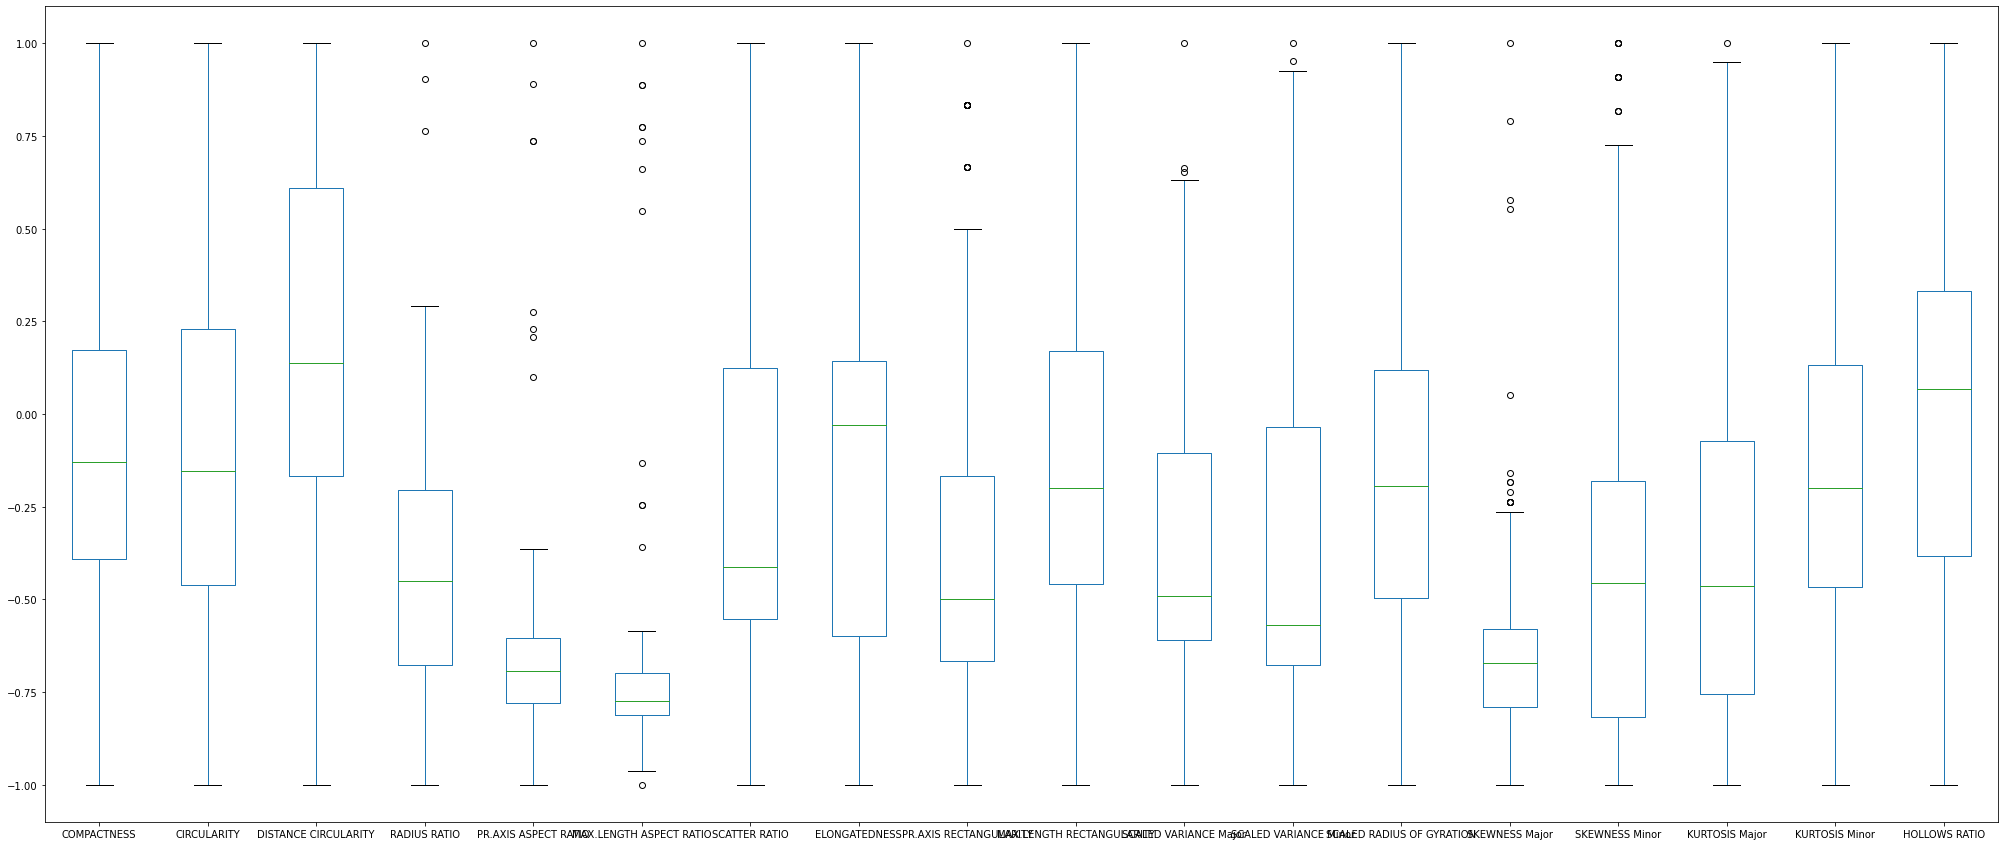

In [13]:
#Understand the spread and outliers in dataset using boxplot
df.boxplot(figsize=(35,15),  grid = False)

### This boxplot helps us to identify the outliers in our dataset as we can see that radius ratio, pr.axis aspect ratio, max.length aspect ratio, pr.axis rectangularity, scaled varience major, scaled varience minor, skewness major, skewness minor & kurtosis major.



array([[<AxesSubplot:title={'center':'COMPACTNESS'}>,
        <AxesSubplot:title={'center':'CIRCULARITY'}>,
        <AxesSubplot:title={'center':'DISTANCE CIRCULARITY'}>,
        <AxesSubplot:title={'center':'RADIUS RATIO'}>],
       [<AxesSubplot:title={'center':'PR.AXIS ASPECT RATIO'}>,
        <AxesSubplot:title={'center':'MAX.LENGTH ASPECT RATIO'}>,
        <AxesSubplot:title={'center':'SCATTER RATIO'}>,
        <AxesSubplot:title={'center':'ELONGATEDNESS'}>],
       [<AxesSubplot:title={'center':'PR.AXIS RECTANGULARITY'}>,
        <AxesSubplot:title={'center':'MAX.LENGTH RECTANGULARITY'}>,
        <AxesSubplot:title={'center':'SCALED VARIANCE Major'}>,
        <AxesSubplot:title={'center':'SCALED VARIANCE Minor'}>],
       [<AxesSubplot:title={'center':'SCALED RADIUS OF GYRATION'}>,
        <AxesSubplot:title={'center':'SKEWNESS Major'}>,
        <AxesSubplot:title={'center':'SKEWNESS Minor'}>,
        <AxesSubplot:title={'center':'KURTOSIS Major'}>],
       [<AxesSubplot:title={'

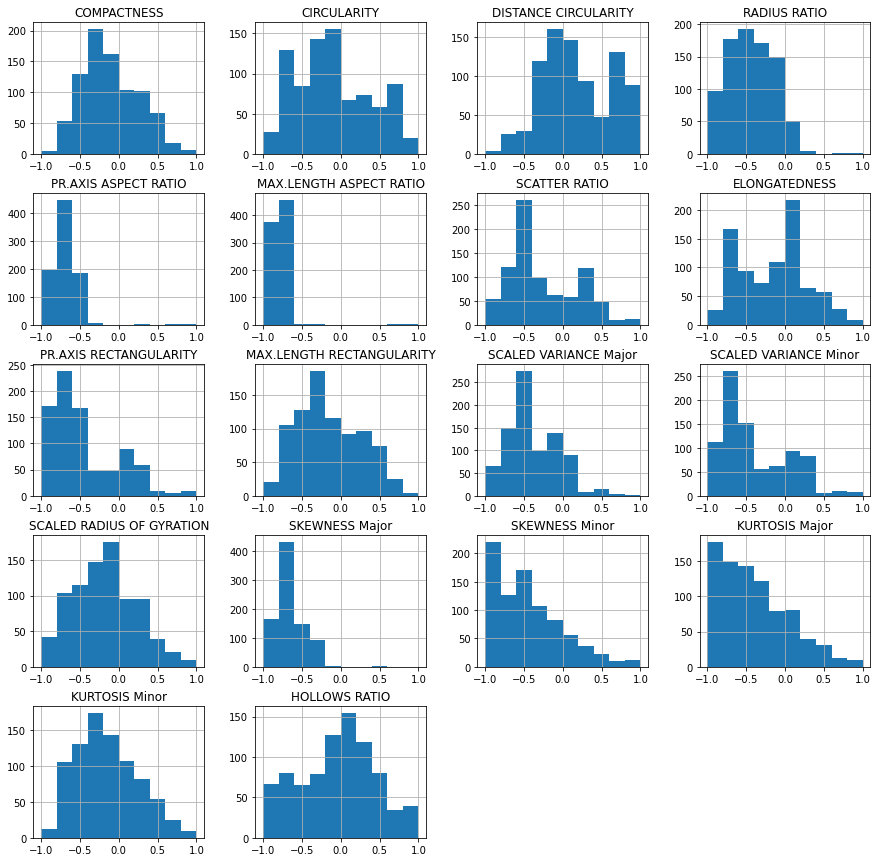

In [14]:
### Histogram
df.hist(figsize=(15,15))

### It is also the distribution of the attributes.

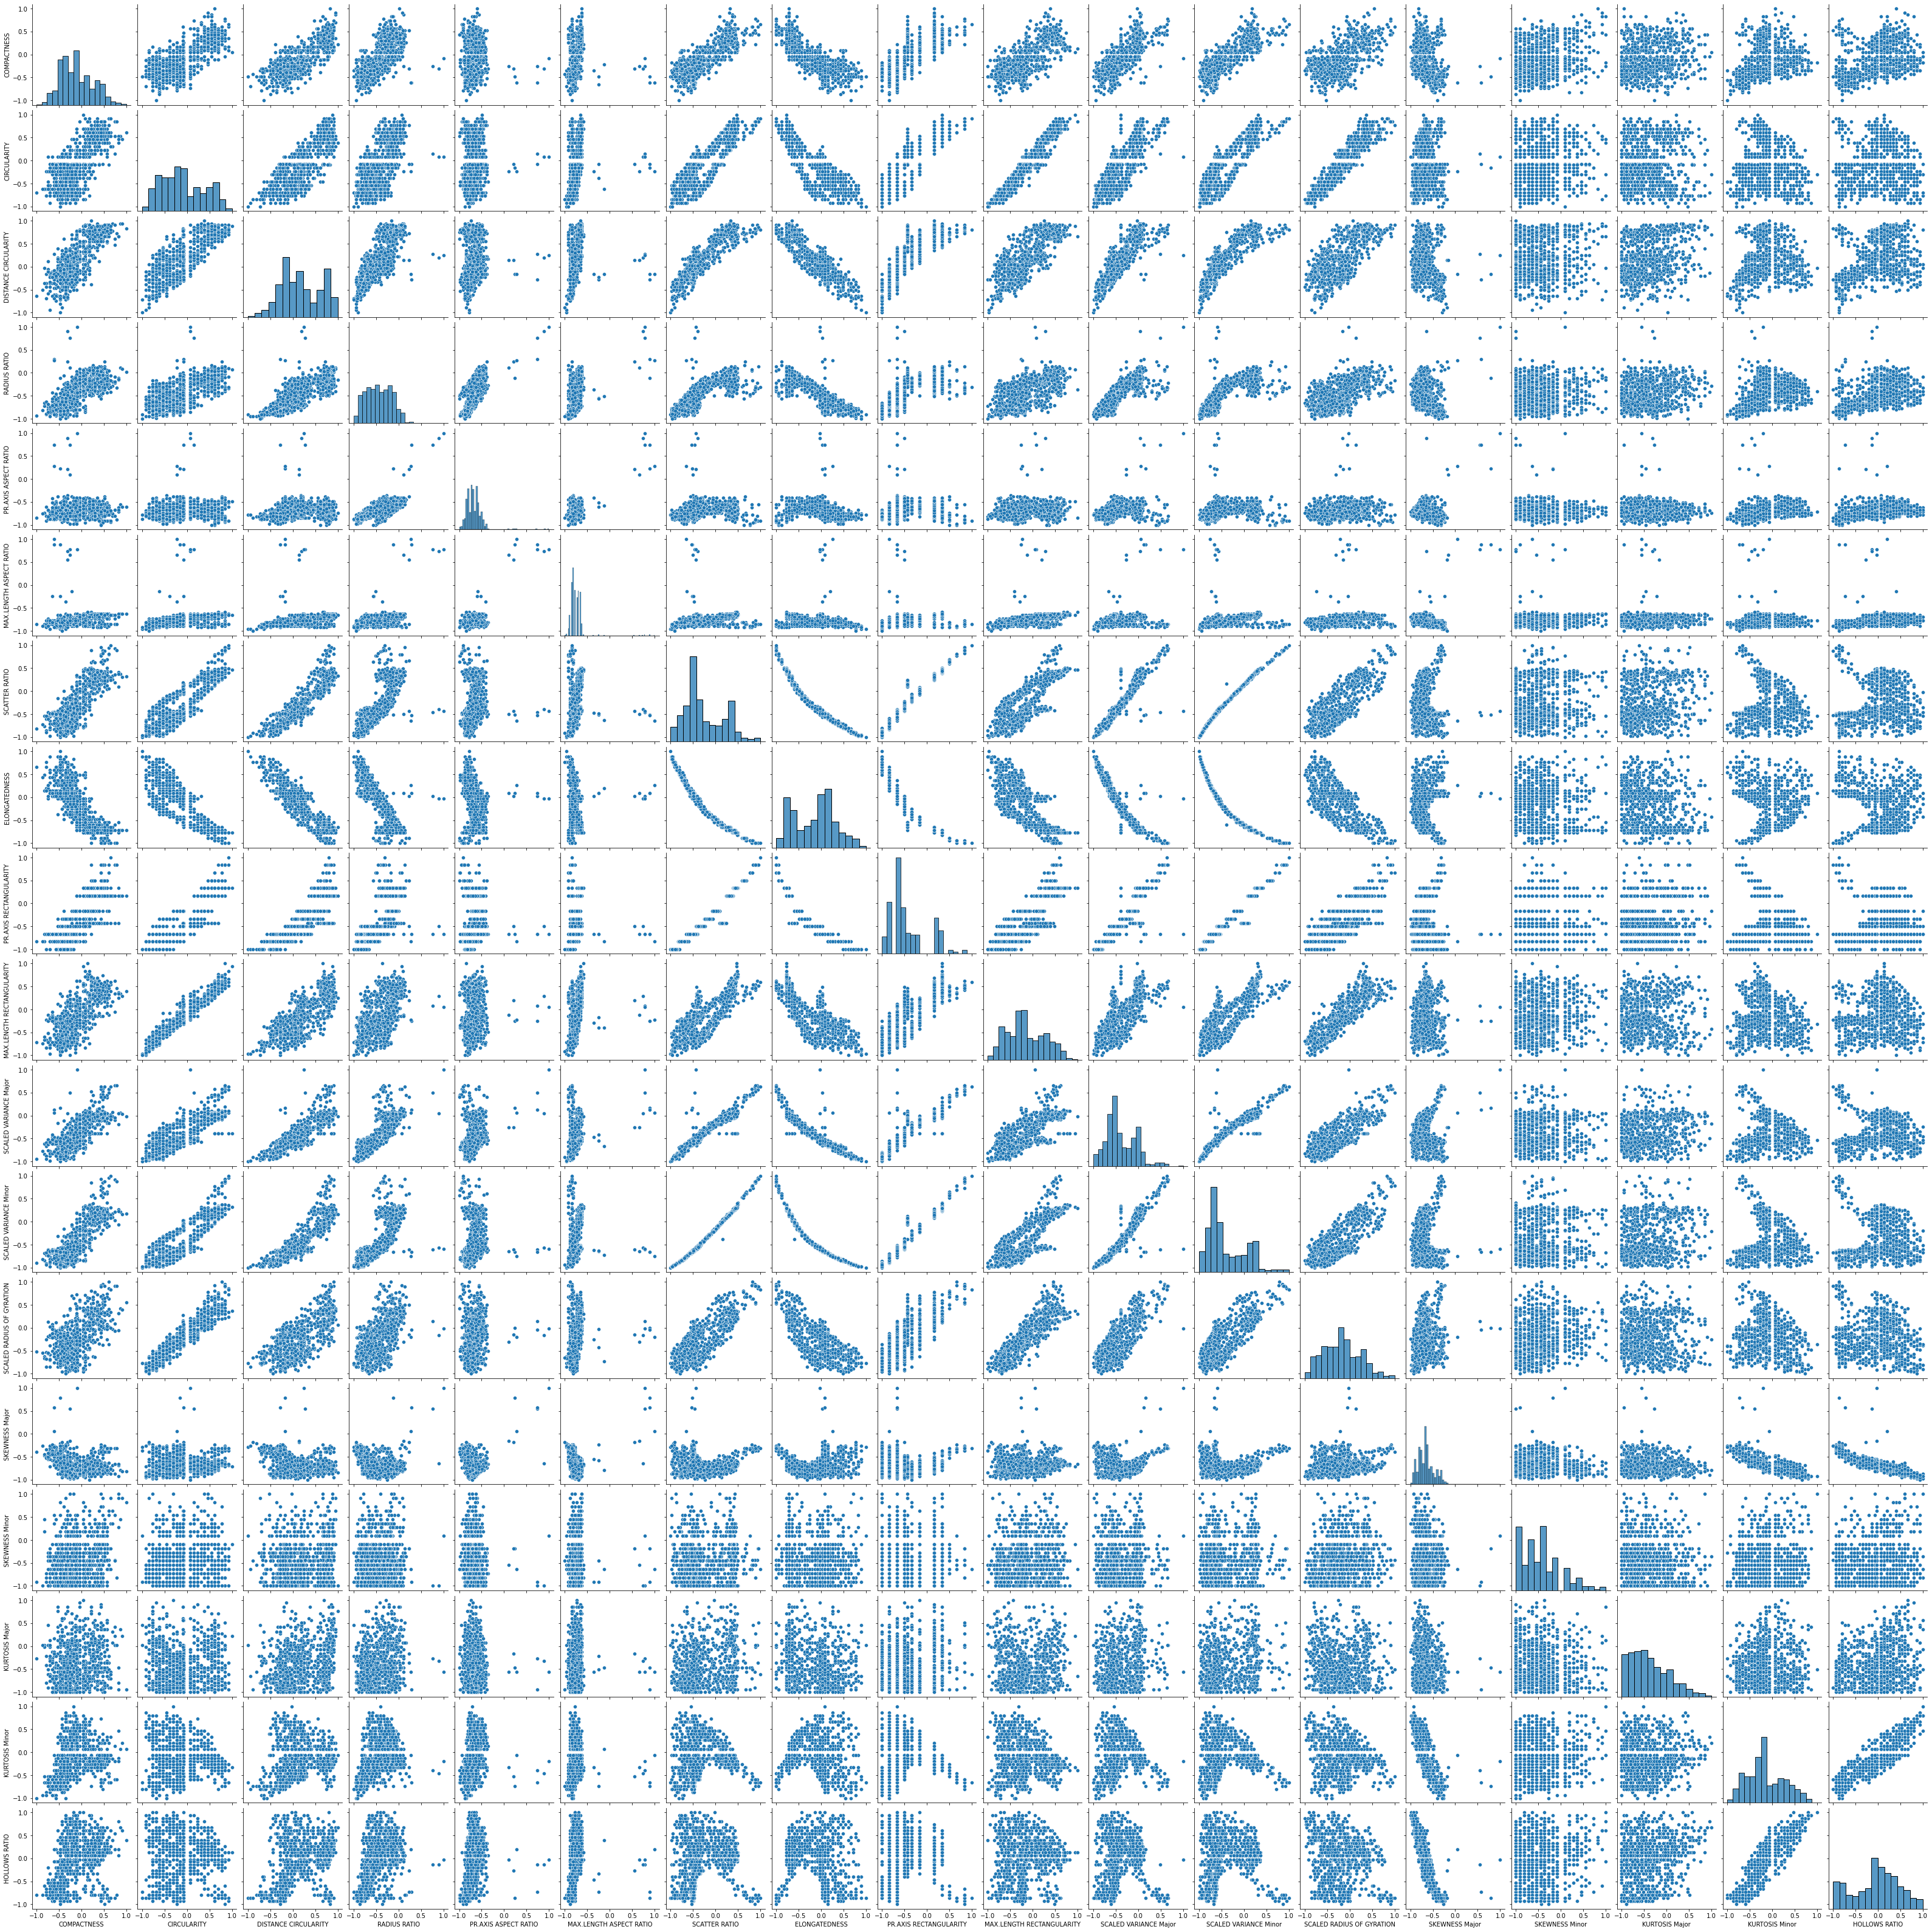

In [15]:
sns.pairplot(df) 
plt.show()

### KMeans Algorithm

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

In [17]:
labels = kmeans.labels_

In [18]:
labels

array([0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 2,
       0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1,
       0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0,
       1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0,
       1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0,
       2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1,

In [19]:
square_distance = []
xlabel = range(2,18)
for i in xlabel:
    model = kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
    square_distance.append(model.inertia_)

In [20]:
 square_distance

[1270.3012714308727,
 1014.0152186768089,
 903.8458633382988,
 821.5829197418077,
 763.9443885946962,
 715.0953454832953,
 671.6292251942112,
 635.453564496016,
 591.8693190559553,
 560.9991203464763,
 532.6361612821335,
 513.7532903711019,
 495.61878922007116,
 476.6009662877393,
 457.9478746551455,
 445.1178937764805]

### Elbow Method 

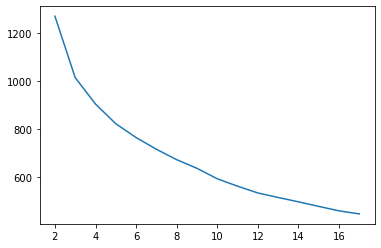

In [21]:
plt.plot(xlabel,square_distance)

### PCA Implied. PCA is used for reducing the dimension of high dimension data set by also minimising imformation loss.

In [22]:
# PCA implied
from sklearn.decomposition import PCA
principal=PCA(n_components=2)
principal.fit(df)
x=principal.transform(df)




In [23]:
print(x)

[[ 0.11675707 -0.00620951]
 [-0.60431668  0.26919813]
 [ 1.38281008 -0.05422915]
 ...
 [ 1.94419991 -0.01947191]
 [-1.35270568  0.30793899]
 [-1.90989315 -0.19469859]]


In [24]:
principal.components_

array([[ 0.23990255,  0.34982558,  0.32555633,  0.18245337,  0.02523739,
         0.03422468,  0.34118588, -0.34449604,  0.31697831,  0.29256571,
         0.24353756,  0.32991101,  0.27913203, -0.01040333,  0.04229705,
         0.06058521,  0.01698751,  0.07685198],
       [ 0.12824903, -0.14174339,  0.1051469 ,  0.14960941,  0.05735689,
         0.00968217, -0.02981532, -0.03493486, -0.05772914, -0.10618576,
        -0.0273987 , -0.03433715, -0.20419108, -0.22925986,  0.07279713,
         0.1739801 ,  0.55756825,  0.68358355]])

In [25]:
df_pca = pd.DataFrame(x,columns = ['pca1', 'pca2'])
df_pca['label']= labels 
df_pca


pca1      pca2  label
0    0.116757 -0.006210      0
1   -0.604317  0.269198      0
2    1.382810 -0.054229      1
3   -0.731191  1.126566      0
4   -0.354088 -1.201670      2
..        ...       ...    ...
841 -0.254118  0.261673      0
842 -0.135647 -0.055466      0
843  1.944200 -0.019472      1
844 -1.352706  0.307939      0
845 -1.909893 -0.194699      2

[846 rows x 3 columns]

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

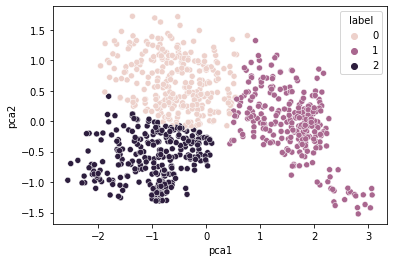

In [26]:
sns.scatterplot(data = df_pca, x= 'pca1', y ='pca2' , hue = 'label')

### Clusters on 2 Dimensional graph using PCA

# Kmeans Algorithm
### K-means clustering is a simple unsupervised learning algorithm that is used to solve clustering problems. 
### It follows a simple procedure of classifying a given data set into a number of clusters

### Pros and Cons of Kmeans

# Pros

### 1. Relatively simple to implement.
### 2. Scales to large data sets.
### 3. Flexible and easily adjust to changes
### 4. Easy to Interpret.

# Cons

### 1. No optimal set of clusters and it needs to be chosen manually before analysis
### 2. Dependent on initial values and can impact on final results.
### 3. Clustering outliers.
### 4. Lacks consistency


### Vehicle Class Data

In [27]:
df2 = pd.read_csv('vehicle_classes - vehicle_classes.csv'  )   

In [28]:
df2

0
0    4
1    4
2    2
3    4
4    3
..  ..
841  2
842  4
843  2
844  2
845  4

[846 rows x 1 columns]

### Renamed the columns name from '0'  to Class

In [29]:
df2.rename(columns = {'0':'Class'}, inplace = True)

In [30]:
df2

Class
0        4
1        4
2        2
3        4
4        3
..     ...
841      2
842      4
843      2
844      2
845      4

[846 rows x 1 columns]

In [31]:
df2.rename( columns={'Unnamed: 0':'Index'}, inplace=True )

In [32]:
df2

Class
0        4
1        4
2        2
3        4
4        3
..     ...
841      2
842      4
843      2
844      2
845      4

[846 rows x 1 columns]

### This shows the value count of each class

In [33]:
pd.value_counts(df2['Class'])

3    218
2    217
1    212
4    199
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

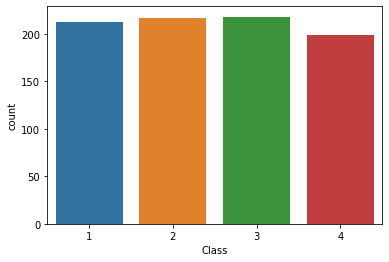

In [34]:
sns.countplot(x='Class',data=df2)

### Used unsupervised Clustering Method with 4 Clusters

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(df2)

In [36]:
labels = kmeans.labels_

In [37]:
labels

array([3, 3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3,
       0, 0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 3, 2,
       2, 3, 3, 0, 3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1,
       0, 1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3,
       0, 1, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0,
       3, 3, 1, 1, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 0, 2, 2,
       2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 1, 0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2,
       3, 0, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0,
       1, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2, 0, 2, 0,
       0, 0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 1, 0, 1, 1,
       0, 2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3,
       2, 0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2,
       0, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2,

In [38]:
 square_distance

[1270.3012714308727,
 1014.0152186768089,
 903.8458633382988,
 821.5829197418077,
 763.9443885946962,
 715.0953454832953,
 671.6292251942112,
 635.453564496016,
 591.8693190559553,
 560.9991203464763,
 532.6361612821335,
 513.7532903711019,
 495.61878922007116,
 476.6009662877393,
 457.9478746551455,
 445.1178937764805]

<AxesSubplot:>

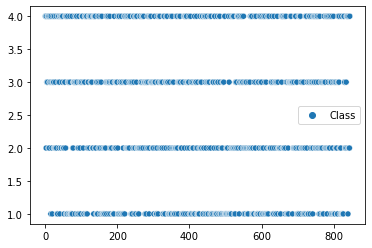

In [39]:
sns.scatterplot(data=df2)

In [40]:
df2_pca = pd.DataFrame(x,columns = ['pca1', 'pca2'])
df2_pca['label']= labels 
df2_pca


pca1      pca2  label
0    0.116757 -0.006210      3
1   -0.604317  0.269198      3
2    1.382810 -0.054229      2
3   -0.731191  1.126566      3
4   -0.354088 -1.201670      0
..        ...       ...    ...
841 -0.254118  0.261673      2
842 -0.135647 -0.055466      3
843  1.944200 -0.019472      2
844 -1.352706  0.307939      2
845 -1.909893 -0.194699      3

[846 rows x 3 columns]

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

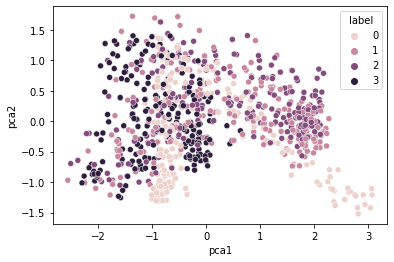

In [41]:
sns.scatterplot(data = df2_pca, x= 'pca1', y ='pca2', hue = 'label')

In [42]:
from sklearn.decomposition import PCA
principal=PCA(n_components=2)
principal.fit(df2_pca)
x1=principal.transform(df2_pca)

In [43]:
principal.components_

array([[ 0.85478421, -0.0658949 , -0.51478327],
       [-0.51607084, -0.21286412, -0.82967449]])

Text(0, 0.5, 'pc2')

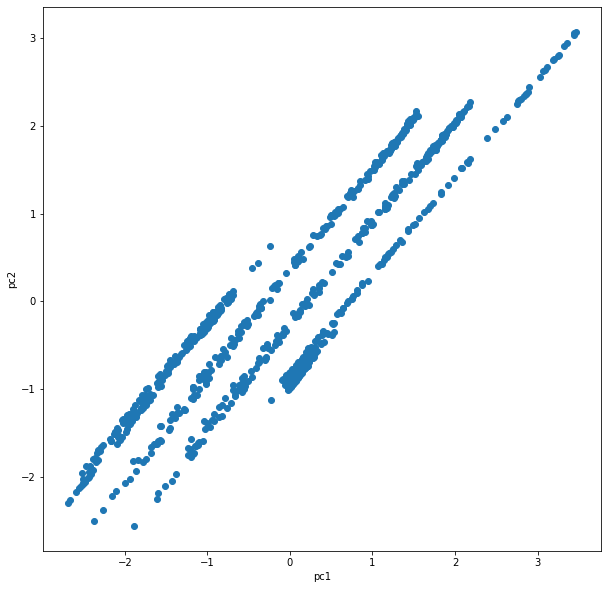

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(x1[:,0],x[:,0], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

### Combined  'vehicle_data.csv' and 'vehicle_classes.csv', 

In [45]:
df3 =  pd.concat([df, df2], axis="columns")

In [46]:
df3

COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0      -0.043478     0.153846              0.194444     -0.353712   
1      -0.217391    -0.384615              0.222222     -0.676856   
2       0.347826     0.307692              0.833333     -0.082969   
3      -0.130435    -0.384615              0.166667     -0.519651   
4      -0.478261    -0.153846             -0.166667     -0.117904   
..           ...          ...                   ...           ...   
841    -0.130435    -0.538462              0.305556     -0.310044   
842    -0.304348    -0.092828              0.222222     -0.484716   
843     0.434783     0.615385              0.694444      0.030568   
844    -0.434783    -0.769231              0.055556     -0.633188   
845    -0.478261    -0.769231             -0.277778     -0.834061   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0               -0.450549                -0.698113      -0.346405   
1               -0.780220                -0.735849      -0.516340   
2               -0.582418                -0.698113       0.241830   
3               -0.648352                -0.735849      -0.581699   
4                0.230769                 0.886792      -0.516340   
..                    ...                      ...            ...   
841             -0.626374                -0.773585      -0.254902   
842             -0.582418                -0.660377      -0.385621   
843             -0.560440                -0.622642       0.437908   
844             -0.758242                -0.811321      -0.699346   
845             -0.824176                -0.886792      -0.895425   

     ELONGATEDNESS  PR.AXIS RECTANGULARITY  MAX.LENGTH RECTANGULARITY  \
0        -0.085714               -0.500000                   0.171429   
1         0.085714               -0.666667                  -0.285714   
2        -0.657143               -0.429261                   0.142857   
3         0.142857               -0.666667                  -0.285714   
4         0.085714               -0.666667                  -0.257143   
..             ...                     ...                        ...   
841      -0.200000               -0.500000                  -0.542857   
842      -0.028571               -0.500000                   0.171429   
843      -0.771429                0.333333                   0.571429   
844       0.371429               -0.833333                  -0.828571   
845       0.714286               -1.000000                  -0.714286   

     SCALED VARIANCE Major  SCALED VARIANCE Minor  SCALED RADIUS OF GYRATION  \
0                -0.515789              -0.532374                  -0.056604   
1                -0.578947              -0.649880                  -0.383648   
2                -0.021053               0.081535                   0.396226   
3                -0.684211              -0.700240                  -0.773585   
4                 0.168421              -0.661871                  -0.006289   
..                     ...                    ...                        ...   
841              -0.263158              -0.429257                  -0.496855   
842              -0.547368              -0.558753                  -0.157233   
843               0.031579               0.287770                   0.144654   
844              -0.736842              -0.793765                  -0.509434   
845              -0.894737              -0.932854                  -0.723270   

     SKEWNESS Major  SKEWNESS Minor  KURTOSIS Major  KURTOSIS Minor  \
0         -0.710526       -0.454545       -0.219512       -0.266667   
1         -0.657895       -0.181818       -0.317073       -0.133333   
2         -0.631579        0.272727       -0.560976       -0.200000   
3         -0.894737       -0.454545       -0.512195        0.533333   
4          0.789474       -0.181818       -0.463415       -0.733333   
..              ...             ...             ...             ...   
841       -0

### Split the dataset df3 in Train - Validation - Test - Set

In [47]:
from sklearn.model_selection import train_test_split


In [48]:
X = df3.drop(['Class'], axis = 1)


In [49]:
y = df3['Class']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
y

0      4
1      4
2      2
3      4
4      3
      ..
841    2
842    4
843    2
844    2
845    4
Name: Class, Length: 846, dtype: int64

In [52]:
X

COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0      -0.043478     0.153846              0.194444     -0.353712   
1      -0.217391    -0.384615              0.222222     -0.676856   
2       0.347826     0.307692              0.833333     -0.082969   
3      -0.130435    -0.384615              0.166667     -0.519651   
4      -0.478261    -0.153846             -0.166667     -0.117904   
..           ...          ...                   ...           ...   
841    -0.130435    -0.538462              0.305556     -0.310044   
842    -0.304348    -0.092828              0.222222     -0.484716   
843     0.434783     0.615385              0.694444      0.030568   
844    -0.434783    -0.769231              0.055556     -0.633188   
845    -0.478261    -0.769231             -0.277778     -0.834061   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0               -0.450549                -0.698113      -0.346405   
1               -0.780220                -0.735849      -0.516340   
2               -0.582418                -0.698113       0.241830   
3               -0.648352                -0.735849      -0.581699   
4                0.230769                 0.886792      -0.516340   
..                    ...                      ...            ...   
841             -0.626374                -0.773585      -0.254902   
842             -0.582418                -0.660377      -0.385621   
843             -0.560440                -0.622642       0.437908   
844             -0.758242                -0.811321      -0.699346   
845             -0.824176                -0.886792      -0.895425   

     ELONGATEDNESS  PR.AXIS RECTANGULARITY  MAX.LENGTH RECTANGULARITY  \
0        -0.085714               -0.500000                   0.171429   
1         0.085714               -0.666667                  -0.285714   
2        -0.657143               -0.429261                   0.142857   
3         0.142857               -0.666667                  -0.285714   
4         0.085714               -0.666667                  -0.257143   
..             ...                     ...                        ...   
841      -0.200000               -0.500000                  -0.542857   
842      -0.028571               -0.500000                   0.171429   
843      -0.771429                0.333333                   0.571429   
844       0.371429               -0.833333                  -0.828571   
845       0.714286               -1.000000                  -0.714286   

     SCALED VARIANCE Major  SCALED VARIANCE Minor  SCALED RADIUS OF GYRATION  \
0                -0.515789              -0.532374                  -0.056604   
1                -0.578947              -0.649880                  -0.383648   
2                -0.021053               0.081535                   0.396226   
3                -0.684211              -0.700240                  -0.773585   
4                 0.168421              -0.661871                  -0.006289   
..                     ...                    ...                        ...   
841              -0.263158              -0.429257                  -0.496855   
842              -0.547368              -0.558753                  -0.157233   
843               0.031579               0.287770                   0.144654   
844              -0.736842              -0.793765                  -0.509434   
845              -0.894737              -0.932854                  -0.723270   

     SKEWNESS Major  SKEWNESS Minor  KURTOSIS Major  KURTOSIS Minor  \
0         -0.710526       -0.454545       -0.219512       -0.266667   
1         -0.657895       -0.181818       -0.317073       -0.133333   
2         -0.631579        0.272727       -0.560976       -0.200000   
3         -0.894737       -0.454545       -0.512195        0.533333   
4          0.789474       -0.181818       -0.463415       -0.733333   
..              ...             ...             ...             ...   
841       -0

In [53]:
y

0      4
1      4
2      2
3      4
4      3
      ..
841    2
842    4
843    2
844    2
845    4
Name: Class, Length: 846, dtype: int64

###  Reduce the number of features using PCA

In [54]:
xs = X

In [55]:
xscorr = pd.DataFrame(xs, columns = X.columns).corr()

In [56]:
xscorr

COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  \
COMPACTNESS                   1.000000     0.695971              0.791158   
CIRCULARITY                   0.695971     1.000000              0.794160   
DISTANCE CIRCULARITY          0.791158     0.794160              1.000000   
RADIUS RATIO                  0.690367     0.623045              0.772012   
PR.AXIS ASPECT RATIO          0.091550     0.147475              0.164972   
MAX.LENGTH ASPECT RATIO       0.150275     0.247532              0.262709   
SCATTER RATIO                 0.813999     0.861921              0.904304   
ELONGATEDNESS                -0.788250    -0.828958             -0.911111   
PR.AXIS RECTANGULARITY        0.775325     0.835883              0.841219   
MAX.LENGTH RECTANGULARITY     0.676427     0.963257              0.770788   
SCALED VARIANCE Major         0.755707     0.794453              0.852097   
SCALED VARIANCE Minor         0.819271     0.854625              0.885397   
SCALED RADIUS OF GYRATION     0.586153     0.934334              0.701436   
SKEWNESS Major               -0.250524     0.059364             -0.236074   
SKEWNESS Minor                0.222474     0.137456              0.105301   
KURTOSIS Major                0.157784    -0.015167              0.262979   
KURTOSIS Minor                0.286654    -0.115693              0.143404   
HOLLOWS RATIO                 0.361219     0.035106              0.336101   

                           RADIUS RATIO  PR.AXIS ASPECT RATIO  \
COMPACTNESS                    0.690367              0.091550   
CIRCULARITY                    0.623045              0.147475   
DISTANCE CIRCULARITY           0.772012              0.164972   
RADIUS RATIO                   1.000000              0.665406   
PR.AXIS ASPECT RATIO           0.665406              1.000000   
MAX.LENGTH ASPECT RATIO        0.448049              0.648096   
SCATTER RATIO                  0.738461              0.106064   
ELONGATEDNESS                 -0.792557             -0.185086   
PR.AXIS RECTANGULARITY         0.663557              0.065184   
MAX.LENGTH RECTANGULARITY      0.569012              0.128779   
SCALED VARIANCE Major          0.791107              0.277637   
SCALED VARIANCE Minor          0.724749              0.091500   
SCALED RADIUS OF GYRATION      0.539069              0.124408   
SKEWNESS Major                -0.201455              0.117955   
SKEWNESS Minor                 0.042194             -0.056597   
KURTOSIS Major                 0.174299             -0.034180   
KURTOSIS Minor                 0.375725              0.239647   
HOLLOWS RATIO                  0.467656              0.266064   

                           MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
COMPACTNESS                               0.150275       0.813999   
CIRCULARITY                               0.247532       0.861921   
DISTANCE CIRCULARITY                      0.262709       0.904304   
RADIUS RATIO                              0.448049       0.738461   
PR.AXIS ASPECT RATIO                      0.648096       0.106064   
MAX.LENGTH ASPECT RATIO                   1.000000       0.166770   
SCATTER RATIO                             0.166770       1.000000   
ELONGATEDNESS                            -0.180045      -0.973385   
PR.AXIS RECTANGULARITY                    0.153131       0.960001   
MAX.LENGTH RECTANGULARITY                 0.306025       0.809955   
SCALED VARIANCE Major                     0.315058       0.937644   
SCALED VARIANCE Minor                     0.144342       0.995763   
SCALED RADIUS OF GYRATION                 0.189791       0.800932   
SKEWNESS Major                            0.262947      -0.027528   
SKEWNESS Minor                            0.016553       0.061865   
KURTOSIS Major                            0.043379       0.210706   
KURTOSIS Minor                           -0.028281      -0.000334   
HOLLOWS RATIO                             0.142265       0.118566   

               

In [57]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(xs)

PCA()

In [58]:
print(pca.explained_variance_ratio_)

[5.73831511e-01 1.75158925e-01 8.20265017e-02 6.38923180e-02
 2.97987429e-02 2.64564001e-02 1.21218199e-02 1.17485835e-02
 7.38632412e-03 4.58706443e-03 4.18626057e-03 2.85856644e-03
 1.72735953e-03 1.56979166e-03 1.17167875e-03 1.03420762e-03
 3.94820910e-04 4.91234074e-05]


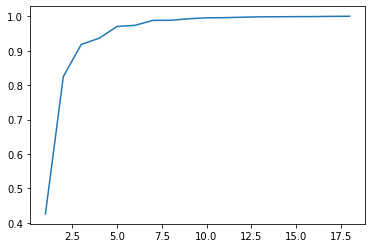

In [59]:
plt.plot(range(1,19),1-pca.explained_variance_ratio_)

#### Reduce the features from 19 to 15.

In [60]:
pca= PCA(n_components= 15)
pca.fit(xs)
pca_x = pca.transform(xs)

In [61]:
pca_x

array([[ 0.11675707, -0.00620951,  0.03880244, ...,  0.07632302,
         0.01493239,  0.03122195],
       [-0.60431668,  0.26919813,  0.13785042, ...,  0.05532015,
         0.08967988, -0.01179961],
       [ 1.38281008, -0.05422915,  0.60151385, ..., -0.06870472,
         0.0271372 , -0.00932777],
       ...,
       [ 1.94419991, -0.01947191,  0.0793138 , ..., -0.07739533,
         0.06266955,  0.06466046],
       [-1.35270568,  0.30793899, -0.84680233, ...,  0.03804777,
        -0.12346105, -0.0677539 ],
       [-1.90989315, -0.19469859, -0.53926461, ..., -0.06731581,
        -0.004553  , -0.04597878]])

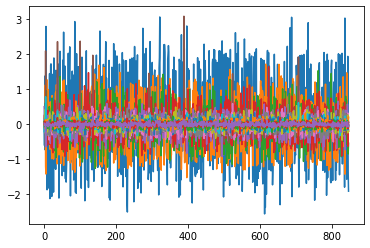

In [62]:
plt.plot(pca_x)

### MODEL BUILDING

### LOGISTIC REGRESSION

In [63]:
y

0      4
1      4
2      2
3      4
4      3
      ..
841    2
842    4
843    2
844    2
845    4
Name: Class, Length: 846, dtype: int64

In [64]:
#Model Building
#Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
prediction = model1.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model1.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ',model1.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.7703180212014135
Accuracy on Testing data:  0.7535714285714286
Recall value:  0.7596726956193612
Precision value:  0.7504198678157323
Confusion Matrix:
 [[39 27  4  1]
 [ 9 36  2  0]
 [ 6 11 74  0]
 [ 2  5  2 62]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.55      0.61        71
           2       0.46      0.77      0.57        47
           3       0.90      0.81      0.86        91
           4       0.98      0.87      0.93        71

    accuracy                           0.75       280
   macro avg       0.76      0.75      0.74       280
weighted avg       0.80      0.75      0.76       280



### Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train, y_train)
prediction = model2.predict(X_test)

In [67]:
model2.score(X_train, y_train)

0.48056537102473496

In [68]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model2.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model2.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.48056537102473496
Accuracy on Testing data:  0.45714285714285713
Recall value:  0.489323448840275
Precision value:  0.5364944083694084
Confusion Matrix:
 [[28 22 26  1]
 [15 29  1  0]
 [ 0  3 10  1]
 [13 25 45 61]]
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.36      0.42        77
           2       0.37      0.64      0.47        45
           3       0.12      0.71      0.21        14
           4       0.97      0.42      0.59       144

    accuracy                           0.46       280
   macro avg       0.49      0.54      0.42       280
weighted avg       0.70      0.46      0.50       280



### Model score 0.45714

### Support Vector 

In [69]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [70]:
# check the accuracy on the training data
print('Accuracy on Training data: ',clf.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', clf.score(X_test , y_test))




Accuracy on Training data:  0.7791519434628975
Accuracy on Testing data:  0.7428571428571429


### Model Score 0.7428

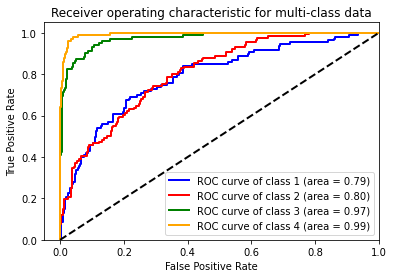

In [71]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn import svm, datasets

from sklearn.preprocessing import label_binarize
df3 = label_binarize(y, classes=[1,2,3,4])
n_classes = df3.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, df3, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

### Used Random forest from Bagging technique 

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

rfc=RandomForestClassifier()
model = rfc.fit(X_train, y_train)
prediction = model.predict(X_test)



In [73]:
accuracy_score(y_test, prediction)

0.6595744680851063

In [74]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt